In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC,LinearSVC
from tensorflow.keras.models import Sequential
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from tensorflow.keras.layers import Dense,Dropout, Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import mean_squared_error,accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,classification_report,roc_curve,auc
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv('/content/bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [6]:
df.shape

(11162, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [9]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
10367,30,management,single,tertiary,no,1636,no,no,unknown,6,jun,301,2,-1,0,unknown,no
10583,41,technician,married,secondary,no,862,no,no,cellular,18,nov,474,2,-1,0,unknown,no
9682,54,blue-collar,married,primary,no,244,yes,no,cellular,29,jul,337,2,-1,0,unknown,no
8161,35,technician,married,secondary,no,1067,no,yes,cellular,12,aug,179,6,-1,0,unknown,no
2555,55,technician,married,secondary,no,1938,no,yes,cellular,18,aug,193,1,386,3,success,yes


In [15]:
df.sample(5, random_state=42)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
5527,65,retired,divorced,secondary,no,744,no,no,cellular,5,jul,182,1,-1,0,unknown,no
4541,38,blue-collar,married,secondary,no,1627,no,no,unknown,16,jun,1323,9,-1,0,unknown,yes
1964,35,blue-collar,single,secondary,no,4963,yes,no,cellular,14,may,456,1,300,1,failure,yes
5007,47,blue-collar,married,secondary,no,8229,no,no,cellular,8,aug,784,2,-1,0,unknown,yes
8928,35,technician,married,tertiary,no,1473,yes,no,unknown,12,may,84,3,-1,0,unknown,no


In [16]:
null_counts = df.isnull().sum()
print(null_counts)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


In [17]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


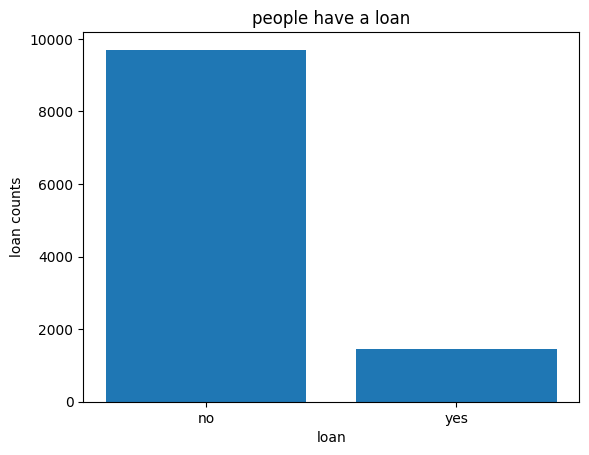

In [18]:
counts=df["loan"].value_counts()
counts
plt.bar(['no','yes'] ,counts)
plt.xlabel("loan")
plt.ylabel("loan counts")
plt.title("people have a loan")
plt.show()

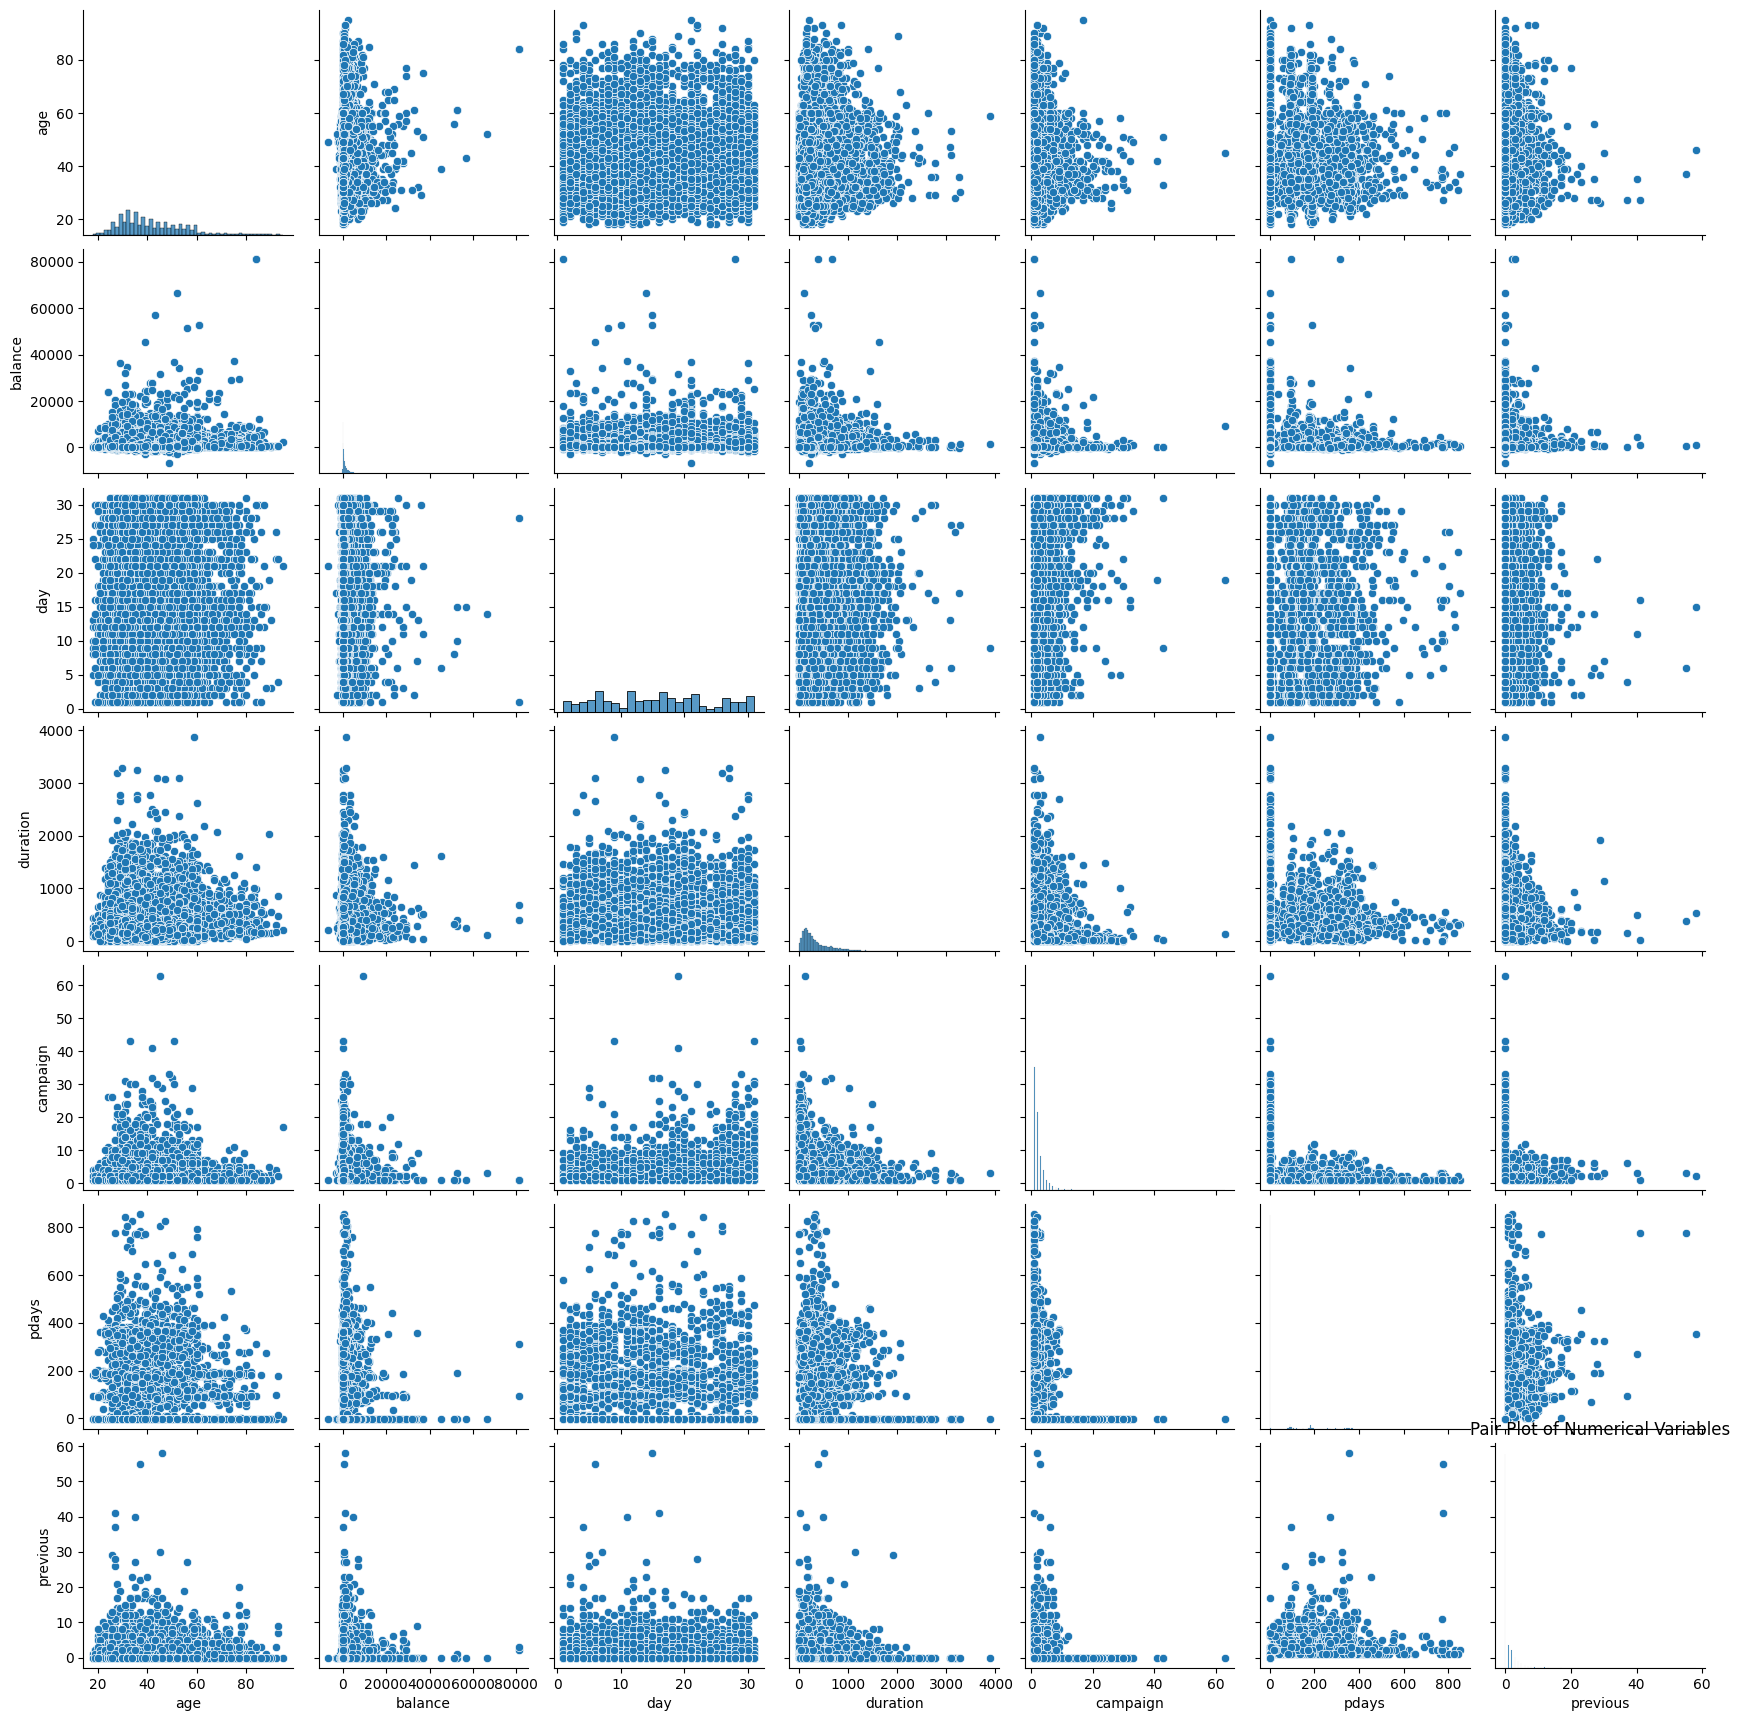

In [19]:
sns.pairplot(df[df.select_dtypes(exclude="object").columns])
plt.title('Pair Plot of Numerical Variables')
plt.show()

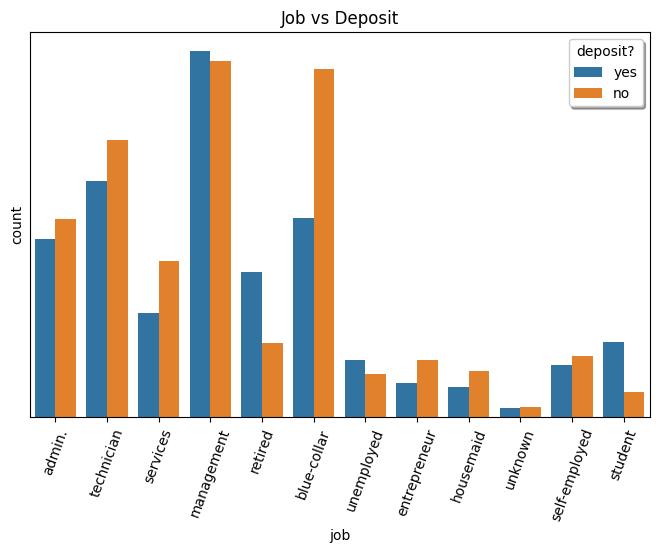

In [20]:
plt.figure(figsize=(8, 5));
plt.title('Job vs Deposit')
g = sns.countplot(x= 'job', hue = 'deposit', data=df)
plt.xticks(rotation=70)
plt.yticks([])
plt.legend(title='deposit?', ncol=1, fancybox=True, shadow=True)
plt.show()

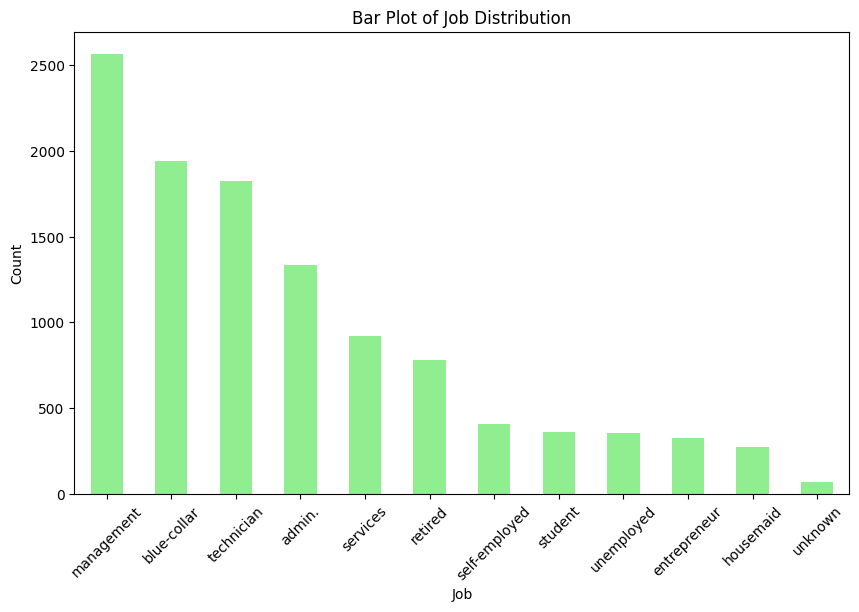

In [21]:
plt.figure(figsize=(10, 6))
job_counts = df['job'].value_counts()
job_counts.plot(kind='bar', color='lightgreen')
plt.xlabel('Job')
plt.ylabel('Count')
plt.title('Bar Plot of Job Distribution')
plt.xticks(range(len(job_counts)), job_counts.index, rotation=45)
plt.show()

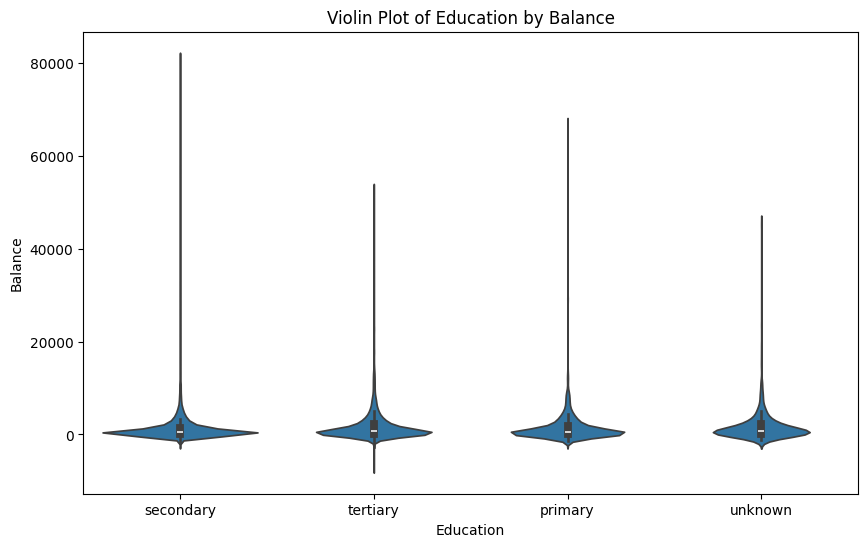

In [22]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='education', y='balance')
plt.xlabel('Education')
plt.ylabel('Balance')
plt.title('Violin Plot of Education by Balance')
plt.show()

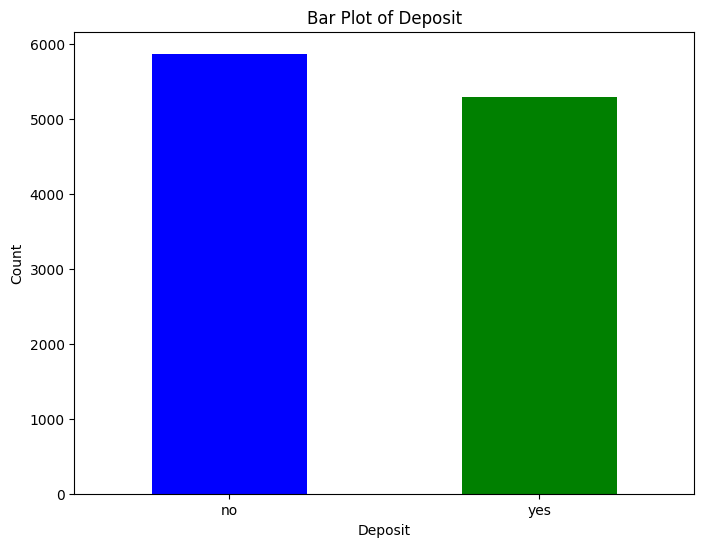

In [23]:
plt.figure(figsize=(8, 6))
df['deposit'].value_counts().plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Deposit')
plt.ylabel('Count')
plt.title('Bar Plot of Deposit')
plt.xticks(rotation=0)
plt.show()

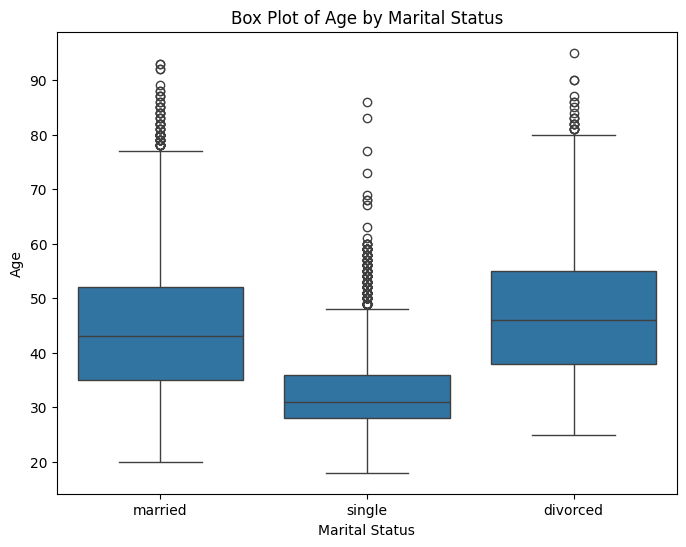

In [24]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='marital', y='age')
plt.xlabel('Marital Status')
plt.ylabel('Age')
plt.title('Box Plot of Age by Marital Status')
plt.show()

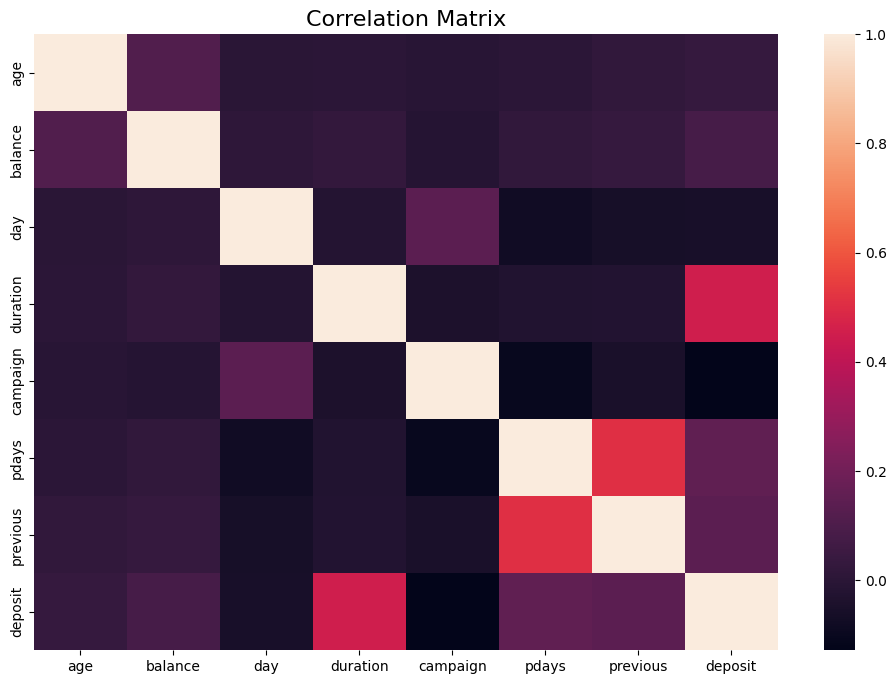

In [25]:
df2=df.copy()
fig = plt.figure(figsize=(12,8))
df2['deposit'] = LabelEncoder().fit_transform(df2['deposit'])



numeric_df = df2.select_dtypes(exclude="object")

corr= numeric_df.corr()


sns.heatmap(corr, cbar=True)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

In [26]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes


In [28]:
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(exclude=['object']).columns

In [29]:
df[numerical_columns].head(3)

,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0


In [30]:
df[categorical_columns].head(3)

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,admin.,married,secondary,no,yes,no,unknown,may,unknown,yes
1,admin.,married,secondary,no,no,no,unknown,may,unknown,yes
2,technician,married,secondary,no,yes,no,unknown,may,unknown,yes


In [31]:
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [32]:
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1.491505,0,1,1,0,0.252525,1,0,2,-1.265746,8,1.930226,-0.554168,-0.481184,-0.36326,3,1
1,1.239676,0,1,1,0,-0.459974,0,0,2,-1.265746,8,3.154612,-0.554168,-0.481184,-0.36326,3,1
2,-0.019470,9,1,1,0,-0.080160,1,0,2,-1.265746,8,2.929901,-0.554168,-0.481184,-0.36326,3,1


In [33]:
X = df.drop(columns=['deposit'])
y = df['deposit']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
print('train features shape: ',X_train.shape)
print('train target   shape: ',y_train.shape)
print('__________\n')
print('test  features shape: ',X_test.shape)
print('test  target   shape: ',y_test.shape)

train features shape:  (8929, 16)
train target   shape:  (8929,)
__________

test  features shape:  (2233, 16)
test  target   shape:  (2233,)


In [36]:
LR=LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [37]:
y_pred=LR.predict(X_test)
y_pred

array([0.47578849, 0.89877642, 0.64161814, ..., 0.41903778, 0.9028321 ,
       0.49171316])

In [38]:
y_test

5527     0
4541     1
1964     1
5007     1
8928     0
        ..
376      1
5544     0
10749    0
3881     1
6786     0
Name: deposit, Length: 2233, dtype: int64

In [39]:
threshold = 0.5
y_pred = np.where(y_pred >= threshold, 1, 0)
print(classification_report(y_test,y_pred,target_names=['not deposit','deposit']))

              precision    recall  f1-score   support

 not deposit       0.77      0.83      0.80      1166
     deposit       0.80      0.73      0.76      1067

    accuracy                           0.78      2233
   macro avg       0.78      0.78      0.78      2233
weighted avg       0.78      0.78      0.78      2233



In [40]:
LR.coef_

array([ 0.01005144,  0.00127897,  0.02464056,  0.0363305 , -0.0497507 ,
        0.01635566, -0.17108601, -0.11078905, -0.10842142, -0.0117625 ,
        0.0085283 ,  0.22947051, -0.03703521,  0.06142579,  0.04159872,
        0.02854728])

In [41]:
LR.intercept_

0.42356194877916614

In [42]:
results = pd.DataFrame(columns=['Model Name','Accuracy','Precision Score','Recall Score','F1-Score','roc_auc'])

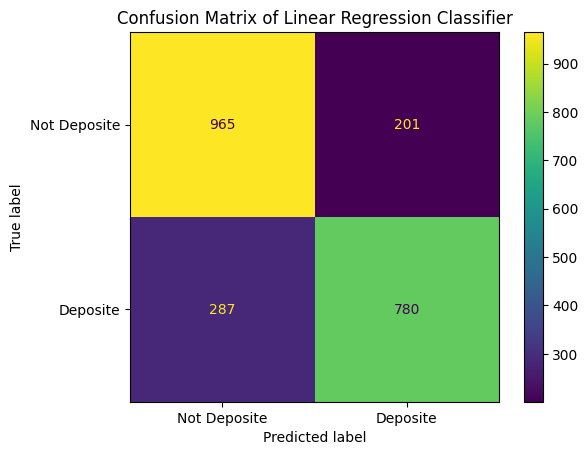

In [43]:
cm_matrix = confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_matrix, display_labels = ['Not Deposite','Deposite'])
cm_display.plot()
plt.title("Confusion Matrix of Linear Regression Classifier")
plt.show()

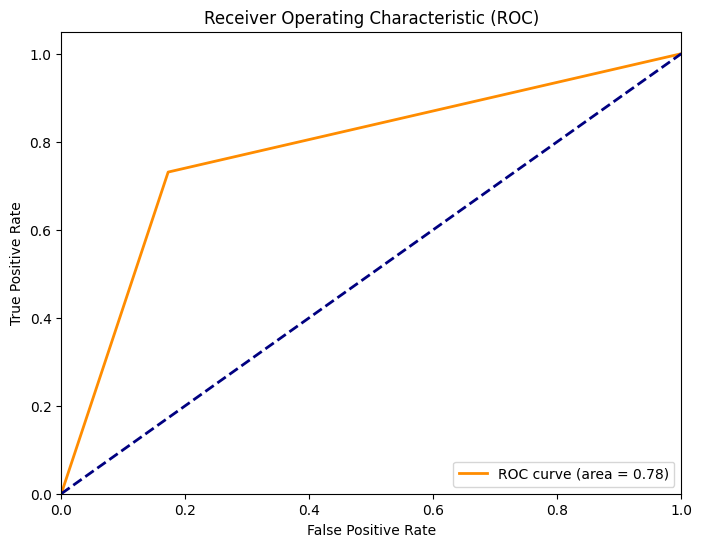

In [44]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [45]:
model_result = ['Linear Regression',accuracy_score(y_test,y_pred),
              precision_score(y_test,y_pred), recall_score(y_test,y_pred),
              f1_score(y_test,y_pred),roc_auc]
results.loc[len(results)]=model_result
results

,Model Name,Accuracy,Precision Score,Recall Score,F1-Score,roc_auc
0,Linear Regression,0.78146,0.795107,0.731022,0.761719,0.779319


In [46]:
RF=RandomForestClassifier(n_estimators=10,criterion='entropy')
RF.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [47]:
y_pred=RF.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 1, 0])

In [48]:
print(classification_report(y_test,y_pred,target_names=['not deposit','deposit']))

              precision    recall  f1-score   support

 not deposit       0.82      0.83      0.83      1166
     deposit       0.81      0.80      0.81      1067

    accuracy                           0.82      2233
   macro avg       0.82      0.82      0.82      2233
weighted avg       0.82      0.82      0.82      2233



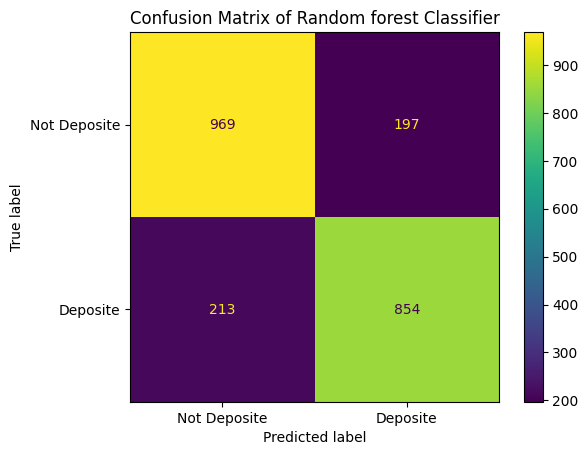

In [49]:
cm_matrix = confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_matrix, display_labels = ['Not Deposite','Deposite'])
cm_display.plot()
plt.title("Confusion Matrix of Random forest Classifier")
plt.show()

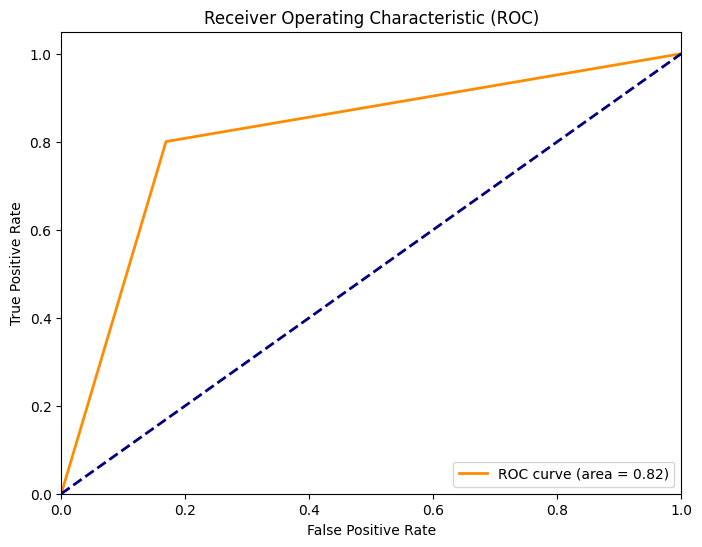

In [50]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [51]:
model_result = ['Random Forest',accuracy_score(y_test,y_pred),
              precision_score(y_test,y_pred), recall_score(y_test,y_pred),
              f1_score(y_test,y_pred),roc_auc]
results.loc[len(results)]=model_result
results

,Model Name,Accuracy,Precision Score,Recall Score,F1-Score,roc_auc
0,Linear Regression,0.781460,0.795107,0.731022,0.761719,0.779319
1,Random Forest,0.816391,0.812559,0.800375,0.806421,0.815711


In [52]:
Logistic_regression = LogisticRegression(penalty='l2', dual=False, C=0.9, fit_intercept=True
                        , random_state = 41, max_iter=1000)
Logistic_regression.fit(X_train, y_train)

LogisticRegression(C=0.9, max_iter=1000, random_state=41)

In [53]:
y_pred=Logistic_regression.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 1, 0])

In [54]:
print(classification_report(y_test,y_pred,target_names=['not deposit','deposit']))

              precision    recall  f1-score   support

 not deposit       0.79      0.82      0.80      1166
     deposit       0.79      0.76      0.77      1067

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.79      2233
weighted avg       0.79      0.79      0.79      2233



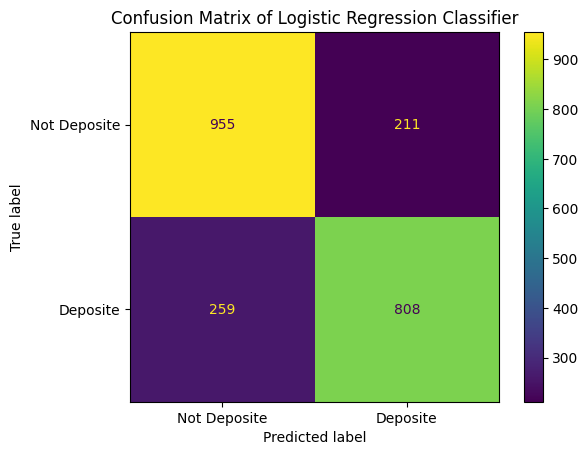

In [55]:
cm_matrix = confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_matrix, display_labels = ['Not Deposite','Deposite'])
cm_display.plot()
plt.title("Confusion Matrix of Logistic Regression Classifier")
plt.show()

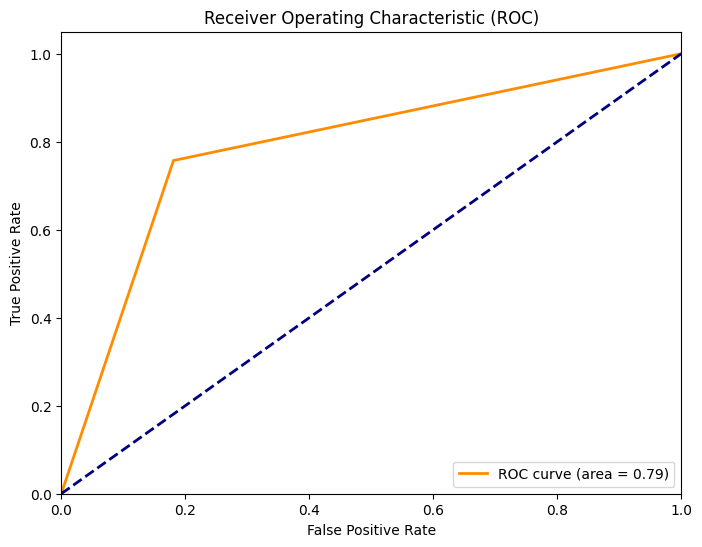

In [56]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [57]:
model_result = ['Logistic Regression',accuracy_score(y_test,y_pred),
              precision_score(y_test,y_pred), recall_score(y_test,y_pred),
              f1_score(y_test,y_pred),roc_auc]
results.loc[len(results)]=model_result
results

,Model Name,Accuracy,Precision Score,Recall Score,F1-Score,roc_auc
0,Linear Regression,0.781460,0.795107,0.731022,0.761719,0.779319
1,Random Forest,0.816391,0.812559,0.800375,0.806421,0.815711
2,Logistic Regression,0.789521,0.792934,0.757263,0.774688,0.788151


In [58]:
LSVC = LinearSVC(penalty='l2',dual=False, C=.9)
LSVC.fit(X_train,y_train)

LinearSVC(C=0.9, dual=False)

In [59]:
y_pred=LSVC.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 1, 0])

In [60]:
print(classification_report(y_test,y_pred,target_names=['not deposit','deposit']))

              precision    recall  f1-score   support

 not deposit       0.78      0.82      0.80      1166
     deposit       0.79      0.75      0.77      1067

    accuracy                           0.79      2233
   macro avg       0.79      0.78      0.78      2233
weighted avg       0.79      0.79      0.79      2233



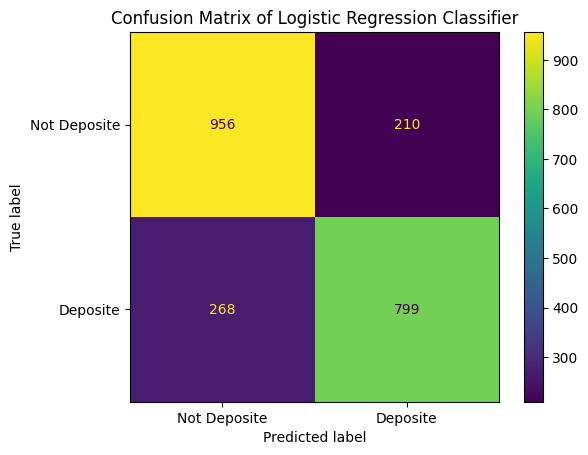

In [61]:
cm_matrix = confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_matrix, display_labels = ['Not Deposite','Deposite'])
cm_display.plot()
plt.title("Confusion Matrix of Logistic Regression Classifier")
plt.show()

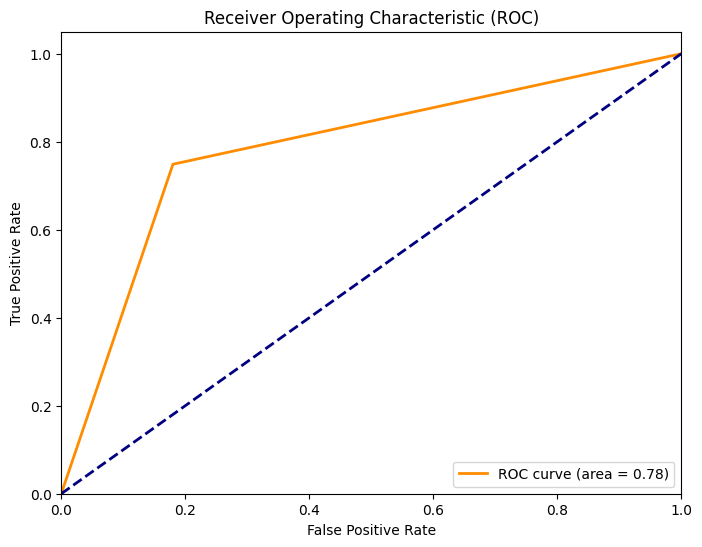

In [62]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [63]:
model_result = ['Linear SVC',accuracy_score(y_test,y_pred),
              precision_score(y_test,y_pred), recall_score(y_test,y_pred),
              f1_score(y_test,y_pred),roc_auc]
results.loc[len(results)]=model_result
results

,Model Name,Accuracy,Precision Score,Recall Score,F1-Score,roc_auc
0,Linear Regression,0.781460,0.795107,0.731022,0.761719,0.779319
1,Random Forest,0.816391,0.812559,0.800375,0.806421,0.815711
2,Logistic Regression,0.789521,0.792934,0.757263,0.774688,0.788151
3,Linear SVC,0.785938,0.791873,0.748828,0.769750,0.784363


CNN

In [64]:
X_normalized = (df - df.min()) / (df.max() - df.min())

X_array = X_normalized.values

N_samples, N_features = X_array.shape
height = 1
width = N_features
channels = 1
X_reshaped = X_array.reshape(N_samples, height, width, channels)

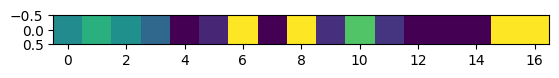

In [65]:
img=X_reshaped[3]
plt.imshow(img)
plt.show()

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

In [67]:
print('train features shape: ',X_train.shape)
print('train target   shape: ',y_train.shape)
print('__________\n')
print('valid  features shape: ',X_valid.shape)
print('valid  target   shape: ',y_valid.shape)
print('__________\n')
print('test  features shape: ',X_test.shape)
print('test  target   shape: ',y_test.shape)

train features shape:  (7589, 1, 17, 1)
train target   shape:  (7589,)
__________

valid  features shape:  (1340, 1, 17, 1)
valid  target   shape:  (1340,)
__________

test  features shape:  (2233, 1, 17, 1)
test  target   shape:  (2233,)


In [68]:
model = Sequential([
    Conv2D(2, (3, 3), activation='relu', input_shape=(height, width, channels), padding='same'),
    MaxPooling2D((1, 2)),
    Flatten(),
    Dense(6, activation='relu'),
    Dropout(.1),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1, 17, 2)          20        
                                                                 
 max_pooling2d (MaxPooling2  (None, 1, 8, 2)           0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 6)                 102       
                                                                 
 dropout (Dropout)           (None, 6)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                        

In [69]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid,y_valid))

Epoch 1/10
238/238 [==============================] - 3s 5ms/step - loss: 0.6331 - accuracy: 0.6980 - val_loss: 0.5274 - val_accuracy: 0.8888
Epoch 2/10
238/238 [==============================] - 1s 4ms/step - loss: 0.3909 - accuracy: 0.9129 - val_loss: 0.2435 - val_accuracy: 0.9873
Epoch 3/10
238/238 [==============================] - 1s 4ms/step - loss: 0.1813 - accuracy: 0.9688 - val_loss: 0.0965 - val_accuracy: 0.9948
Epoch 4/10
238/238 [==============================] - 1s 4ms/step - loss: 0.0930 - accuracy: 0.9835 - val_loss: 0.0459 - val_accuracy: 0.9978
Epoch 5/10
238/238 [==============================] - 1s 4ms/step - loss: 0.0573 - accuracy: 0.9906 - val_loss: 0.0257 - val_accuracy: 0.9993
Epoch 6/10
238/238 [==============================] - 1s 5ms/step - loss: 0.0390 - accuracy: 0.9950 - val_loss: 0.0161 - val_accuracy: 0.9993
Epoch 7/10
238/238 [==============================] - 1s 2ms/step - loss: 0.0298 - accuracy: 0.9958 - val_loss: 0.0104 - val_accuracy: 0.9993
Epoch 

In [70]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_acc)

70/70 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 1.0000
Test Accuracy: 1.0


In [71]:
y_pred=model.predict(X_test)
print(y_pred.shape)
y_pred[:5]

70/70 [==============================] - 0s 2ms/step
(2233, 1)


array([[3.7510900e-03],
       [9.9959838e-01],
       [9.9670863e-01],
       [9.9965668e-01],
       [2.5372978e-04]], dtype=float32)

In [72]:
threshold = 0.5
y_pred = np.where(y_pred >= threshold, 1, 0)
print(classification_report(y_test,y_pred,target_names=['not deposit','deposit']))

              precision    recall  f1-score   support

 not deposit       1.00      1.00      1.00      1166
     deposit       1.00      1.00      1.00      1067

    accuracy                           1.00      2233
   macro avg       1.00      1.00      1.00      2233
weighted avg       1.00      1.00      1.00      2233



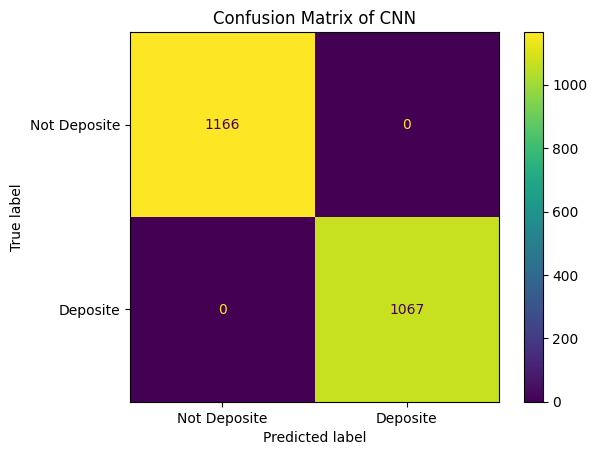

In [73]:
cm_matrix = confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_matrix, display_labels = ['Not Deposite','Deposite'])
cm_display.plot()
plt.title("Confusion Matrix of CNN")
plt.show()

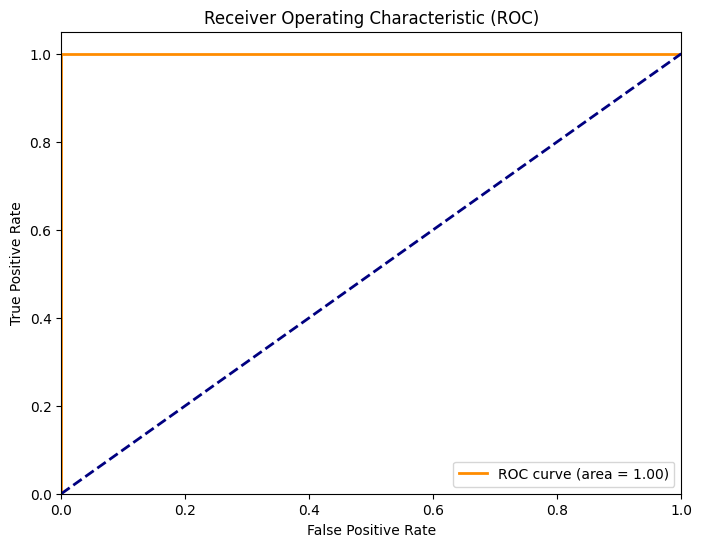

In [74]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [75]:
model_result = ['CNN',accuracy_score(y_test,y_pred),
              precision_score(y_test,y_pred), recall_score(y_test,y_pred),
              f1_score(y_test,y_pred),roc_auc]
results = results.drop(results[results['Model Name'] == 'CNN'].index, errors='ignore')
results.loc[len(results)]=model_result
results

,Model Name,Accuracy,Precision Score,Recall Score,F1-Score,roc_auc
0,Linear Regression,0.781460,0.795107,0.731022,0.761719,0.779319
1,Random Forest,0.816391,0.812559,0.800375,0.806421,0.815711
2,Logistic Regression,0.789521,0.792934,0.757263,0.774688,0.788151
3,Linear SVC,0.785938,0.791873,0.748828,0.769750,0.784363
4,CNN,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
model.save('cnn_model.h5')

In [77]:
results

,Model Name,Accuracy,Precision Score,Recall Score,F1-Score,roc_auc
0,Linear Regression,0.781460,0.795107,0.731022,0.761719,0.779319
1,Random Forest,0.816391,0.812559,0.800375,0.806421,0.815711
2,Logistic Regression,0.789521,0.792934,0.757263,0.774688,0.788151
3,Linear SVC,0.785938,0.791873,0.748828,0.769750,0.784363
4,CNN,1.000000,1.000000,1.000000,1.000000,1.000000


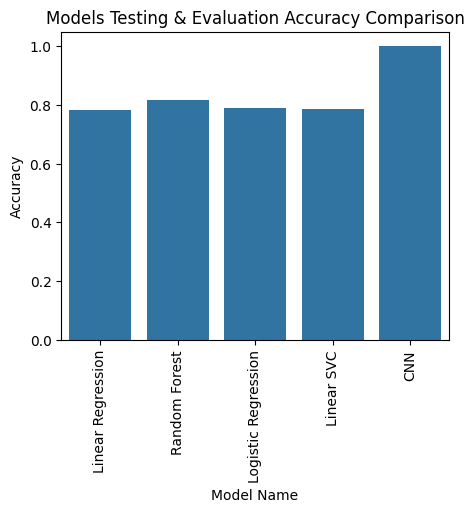

In [78]:
import seaborn as sns
plt.subplots(figsize=(5,4))
sns.barplot(x="Model Name", y="Accuracy",data=results)
plt.xticks(rotation=90)
plt.title('Models Testing & Evaluation Accuracy Comparison')
plt.show()